In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [29]:
def remove_small_components(image_path, area_threshold):
    # Read image
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    # Binalize
    im_mask = cv2.GaussianBlur(image.astype(np.uint8),(5,5),5)
    _, binary_image = cv2.threshold(im_mask, 180,255, cv2.THRESH_BINARY_INV)

    # Label Connected components of black area
    num_labels, labels, stats, _ = cv2.connectedComponentsWithStats(binary_image, connectivity=4)
    
    # Create white image
    new_binary_image = np.ones(binary_image.shape, dtype=np.uint8) * 255

    # Add connected components whose area is larger than threshold
    for i in range(1, num_labels):
        area = stats[i, cv2.CC_STAT_AREA]
        if area >= area_threshold:
            new_binary_image[labels == i] = 0

    # Save image
    fig = plt.figure(figsize=(image.T[:600,:4800].shape[1]/100, image.T[:600,:4800].shape[0]/100))
    plt.imshow(image.T[:600,:4800],cmap="gray")
    # plt.axis('off')
    plt.tick_params(labelbottom=False, labelleft=False, labelright=False, labeltop=False, bottom=False, left=False, right=False, top=False)
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1)
    plt.savefig("original_pattern.pdf")

    fig = plt.figure(figsize=(image.T[:600,:4800].shape[1]/100, image.T[:600,:4800].shape[0]/100))
    plt.tick_params(labelbottom=False, labelleft=False, labelright=False, labeltop=False, bottom=False, left=False, right=False, top=False)
    plt.imshow(new_binary_image.T[:600,:4800],cmap="gray")
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1)
    plt.savefig("denoised_pattern.pdf")
    
    return new_binary_image


In [34]:
# Distribution of gap without boundary.
def dist(img_th):
    t_dist=[]
    for t in img_th:
        c = 0
        b = 0
        for s in t:
            if s == 255 and b == 255:
                c += 1
            elif s == 0 and b == 255:
                t_dist.append(c)
                b = 0
            elif s == 255 and b == 0:
                b = 255
                c = 1
    
    s_dist=[]
    for t in img_th.T:
        c = 0
        b = 0
        for s in t:
            if s == 255 and b == 255:
                c += 1
            elif s == 0 and b == 255:
                s_dist.append(c)
                b = 0
            elif s == 255 and b == 0:
                b = 255
                c = 1
                
    return t_dist, s_dist

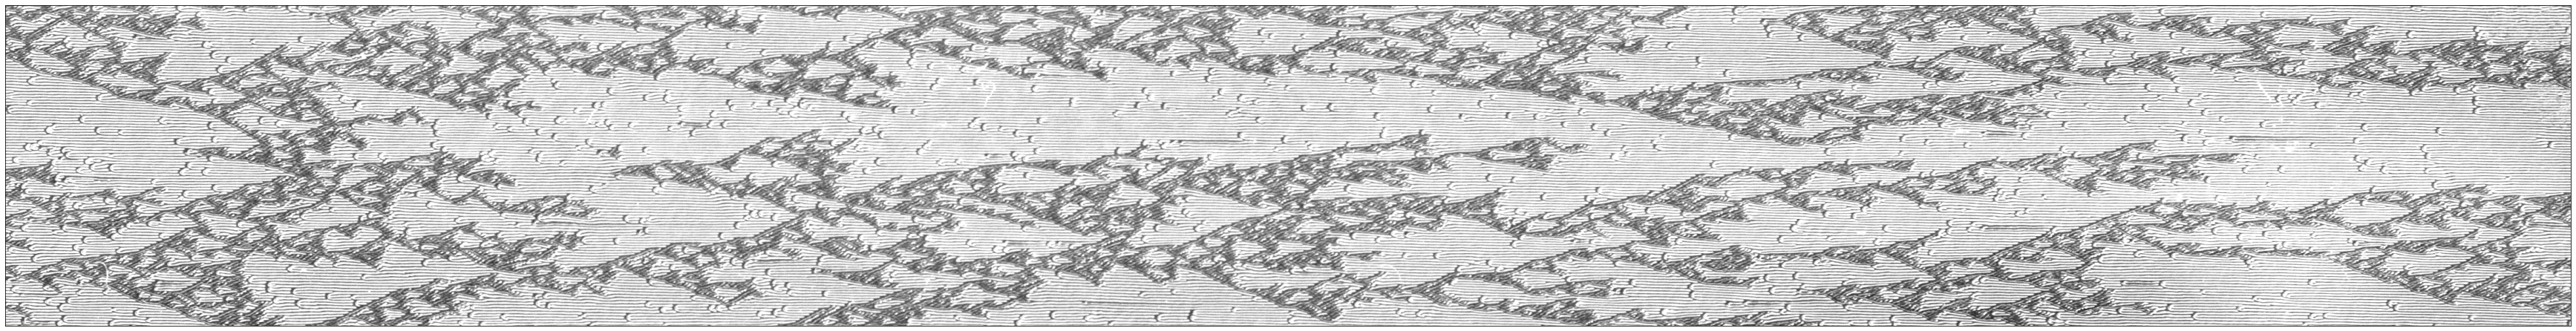

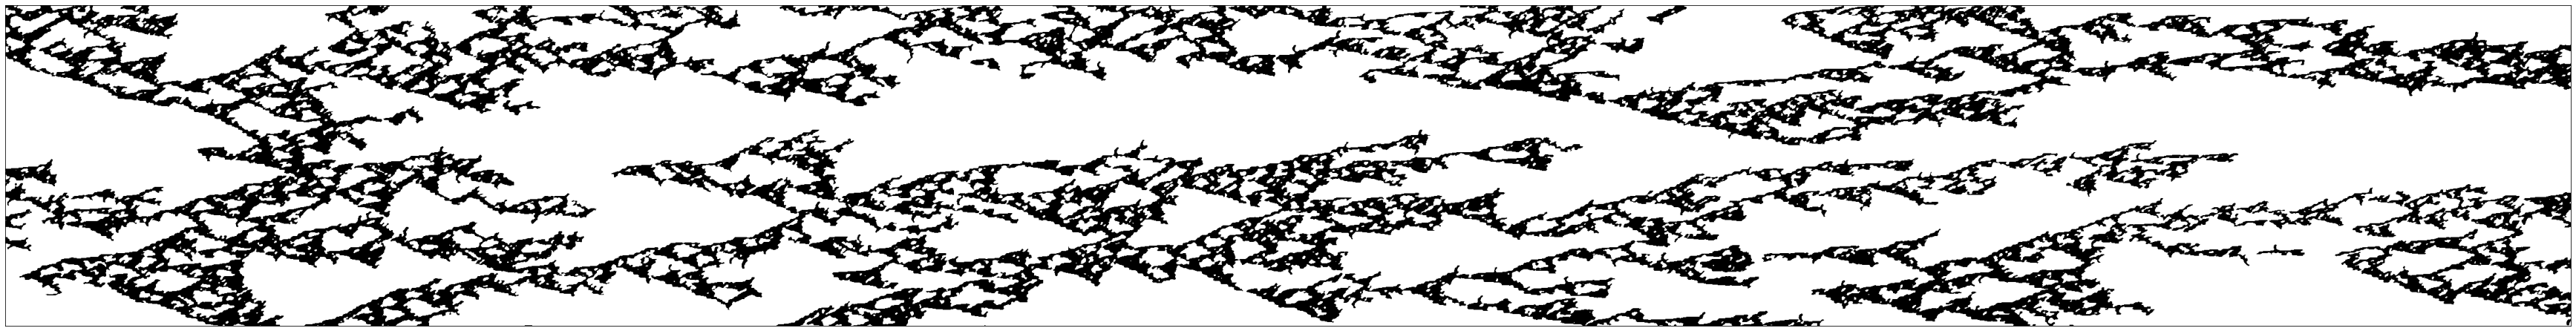

In [38]:
image_path = "./Trim.tif"
area_threshold = 500 
new_binary_image = remove_small_components(image_path, area_threshold)

In [ ]:
t_dist,s_dist = dist(new_binary_image.T[:600,:4800])

t_hist, t_bins =np.histogram(t_dist,bins=np.linspace(50,1051,101))
s_hist, s_bins = np.histogram(s_dist,bins=np.linspace(10,211,101))

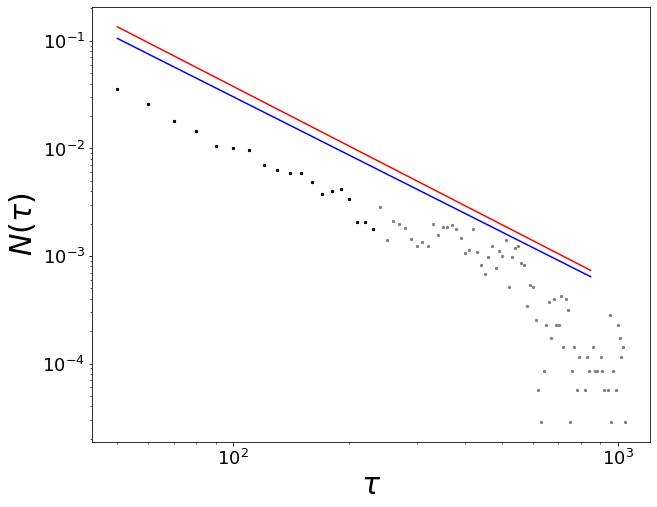

[-1.80464194 14.18809303]


In [39]:
# Time direction

lx=[i+50 for i in range(800)]
ly=[180*(i+50)**(-1.84) for i in range(800)]
lxd=[i+50 for i in range(800)]
lyd=[120*(i+50)**(-1.80) for i in range(800)]

plt.figure(figsize=(10, 8))
plt.scatter(t_bins[:-1],t_hist[:]/len(t_dist), zorder=2, c='gray', s=5)
plt.scatter(t_bins[:19],t_hist[:19]/len(t_dist), zorder=3, c='k', s=5)

plt.xscale("log")
plt.yscale("log")
plt.plot(lx,ly,color='r', zorder=1)
plt.plot(lxd,lyd,color='b', zorder=1)
plt.xlabel('$\\tau$',fontsize=30,fontstyle='italic', fontfamily='serif', fontname='Times New Roman')
plt.ylabel('$N(\\tau)$',fontsize=30,fontstyle='italic', fontfamily='serif', fontname='Times New Roman')
plt.tick_params(axis='both', labelsize=18)
plt.savefig("exp_time.pdf")
plt.show()
x1 = t_bins[:-1]
y1 = t_hist
coef_1 = np.polyfit(np.log(np.array(x1)[:19]),np.log(np.array(y1[:19])),1)
print(coef_1)

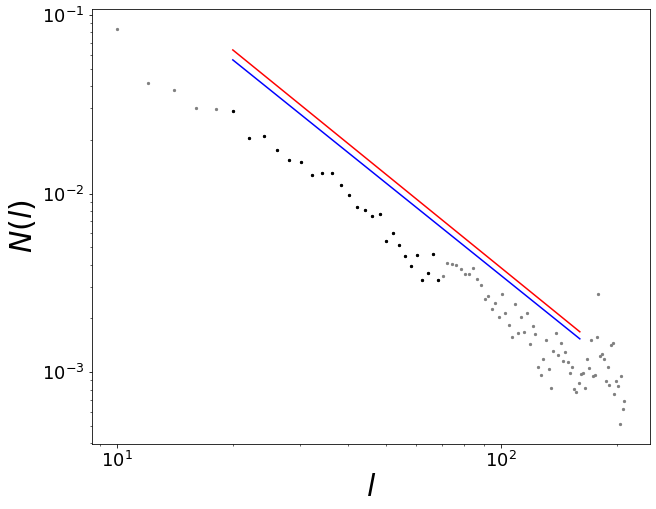

[-1.72586351 12.69092969]


In [40]:
# Spatial direction

lx=[10*i+20 for i in range(15)]
ly=[12*(10*i+20)**(-1.748) for i in range(15)]
lxd=[10*i+20 for i in range(15)]
lyd=[10*(10*i+20)**(-1.73) for i in range(15)]

plt.figure(figsize=(10, 8))

plt.scatter(s_bins[:-1],s_hist[:]/len(s_dist), zorder=2,c ="gray",s=5)
plt.scatter(s_bins[5:30],s_hist[5:30]/len(s_dist), zorder=3, c = "k",s=5)

plt.xscale("log")
plt.yscale("log")
plt.plot(lx,ly,color='r', zorder=1)
plt.plot(lxd,lyd,color='b', zorder=1)
plt.xlabel('$l$',fontsize=30,fontstyle='italic', fontfamily='serif', fontname='Times New Roman')
plt.ylabel('$N(l)$',fontsize=30,fontstyle='italic', fontfamily='serif', fontname='Times New Roman')
plt.tick_params(axis='both', labelsize=18)
plt.savefig("exp_space.pdf")

plt.show()
x1 = s_bins[:-1]
y1 = s_hist
coef_1 = np.polyfit(np.log(np.array(x1)[5:30]),np.log(np.array(y1[5:30])),1)
print(coef_1)

# 